<center><img src="Fig/UGA.png" width="30%" height="30%"></center>
<center><h3>Master of Science in Industrial and Applied Mathematics (MSIAM)  -- 1st year</h3></center>
<hr>
<center><h1>Numerical Optimization</h1></center>
<center><h2>Lab 8: Uzawa method</h2></center>

In [1]:
%load_ext autoreload
%autoreload 2

---

# Uzawa algorithm

In this notebook, we code the Uzawa algorithm. We consider here 
 * Affine constraints (qualified)
 * Other (qualified) convex constraints may be tested but are out of the scope of the convergence theorem that we have proven

### Uzawa algorithm

For minimizing a differentiable function $f:\mathbb{R}^n \to \mathbb{R}$, under affine constraints given:
 * the function to minimize `f`
 * a 1st order oracle `f_grad` (see `problem1.ipynb` for instance)
 * the $m$ constraints are given by `phi` in the form $\phi(x)\le 0$ ; affine constraints are in the form of a matrix `C` $m\times n$ and a vector $d\in\mathbb{R}^m$, $\phi(x)=C x - d$.
 * an initialization point `x0`
 * the sought precision `PREC` 
 * a maximal number of iterations `ITE_MAX` 
 
This algorithm perform iterations of the form
 
 Solve the minimization problem 
 $$ x^{k} = \mbox{arg}\min_{x} J(x) + \lambda^k \cdot \phi(x)$$
 or equivalently solve in $x_k$ with the Newton method
 $$ \nabla J(x^{k}) + C^t \lambda^k= 0 $$
 then one step of the projected gradient (projection onto $\mathbb{R_+}^m$) 
 $$ \lambda^{k+1} = P\left(\lambda^k + \rho \phi(x^k)\right) $$
 where $\rho$ is a stepsize to choose and $P$ is the projector onto the positivity constraint set. 
 
 
For more general (qualified) convex constraints $\phi_i, i=1,\ldots,m$, the first part of the iteration is
 
 Solve in $x^k$ with the Newton method
 $$ \nabla J(x^{k}) +  \sum_{i=1}^m\lambda^k_i \nabla \phi_i(x^{k})= 0 $$
 or in the vectorial form
 $$ \nabla J(x^{k}) +  \lambda^k \cdot \nabla \phi(x^{k})= 0 $$
 the projected gradient step would be identical

# 1. Uzawa algorithm on a simple function with a single affine constraints

We begin by investigating <a href="#pb31">Problem 31</a>

> Observe the 3D and level plots of the function.

In [4]:
import problem31 as pb31

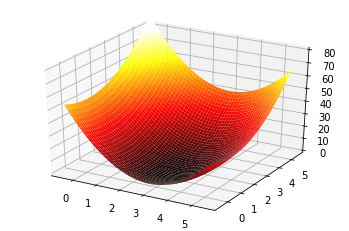

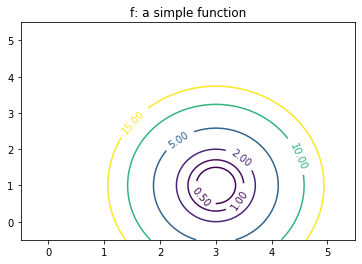

In [5]:
from plotLib import *
%matplotlib inline

custom_3dplot( pb31.f, pb31.x1_min,pb31.x1_max,pb31.x2_min,pb31.x2_max,pb31.nb_points, pb31.vmin, pb31.vmax )
level_plot( pb31.f, pb31.x1_min,pb31.x1_max,pb31.x2_min,pb31.x2_max,pb31.nb_points, pb31.levels , pb31.title )

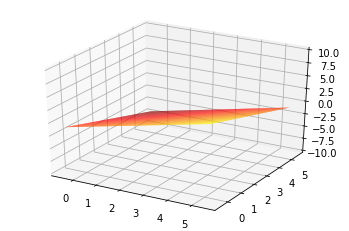

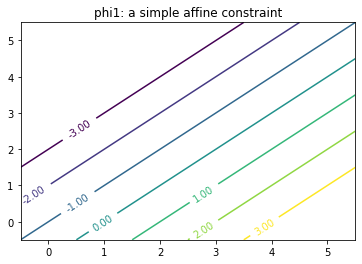

In [6]:
from plotLib import *
%matplotlib inline

custom_3dplot( pb31.phi1, pb31.x1_min,pb31.x1_max,pb31.x2_min,pb31.x2_max,pb31.nb_points, pb31.phi1vmin, pb31.phi1vmax )
level_plot( pb31.phi1, pb31.x1_min,pb31.x1_max,pb31.x2_min,pb31.x2_max,pb31.nb_points, pb31.phi1levels , pb31.phi1title )

### 1.a. Uzawa method for problem31

> Examine the functions and variables defined in `problem31.py`. Complete when asked <br/>
> Complete the function `uzawa_affine_algorithm` and `newton_lagrangian_algo` as asked in `algoUzawa.py` <br/>
> Examine and run the cells below. Notably change the step size `rho` and observe the different behaviors of the algorithm. Modify also the different initial values of lambda0 and x0

In [7]:
from algoUzawa import *  # import all methods of the module into the current environment

import problem31 as pb31

import numpy as np

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.0001                     # Sought precision
ITE_MAX = 15                      # Max number of iterations
x0      = np.array( (0.0,0.0 ) )   # Initial point: does it satisfies the constraint ?
#step    = 1.5/pb21.L                # Stepsize 
rho = pb31.rhomax/2.    #step size in the projected gradient for the dual
lambda0 = np.array( [1.0])  

##### Uzawa affine algorithm

val = pb31.lagrangian(x0,lambda0)
print("val = ({:.2f}) \n".format(val))
val = pb31.lagrangian(x0,lambda0)
g,H = pb31.lagrangian_grad_hessian(x0,lambda0)
print("gradient = ({:.2f},{:.2f}) \n".format(g[0],g[1]))

lambdak,xk,x_tab = uzawa_affine_algorithm(pb31.f , pb31.lagrangian, pb31.lagrangian_grad_hessian,  pb31.phi, x0 , lambda0, rho , PREC , ITE_MAX )

print("phi(xk) = ",(pb31.phi(xk)))
print("lambdak = ",(lambdak))

val = (37.00) 

gradient = (-23.00,-5.00) 

--------------------------
 Constant Stepsize projected gradient
-------------------
START    -- stepsize = 2.0
------------------------------------
Newton's algorithm
------------------------------------
START
Newton FINISHED -- 1 iterations / 0.000116s -- langrangian final value: 0.812500 at point x (2.88,1.25) 


xk = (2.88,1.25) ; gradLangragian = (0.00,0.00) 

------------------------------------
Newton's algorithm
------------------------------------
START
Newton FINISHED -- 1 iterations / 0.000076s -- langrangian final value: 1.300781 at point x (2.72,1.56) 


xk = (2.72,1.56) ; gradLangragian = (0.00,0.00) 

------------------------------------
Newton's algorithm
------------------------------------
START
Newton FINISHED -- 1 iterations / 0.000083s -- langrangian final value: 1.331299 at point x (2.68,1.64) 


xk = (2.68,1.64) ; gradLangragian = (0.00,0.00) 

------------------------------------
Newton's algorithm
--------------------

##### Plotting

The following cell plots the iterates over the level sets of the minimized function.

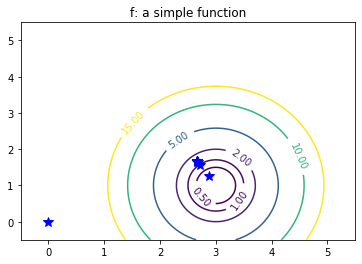

In [8]:
from plotLib import *
%matplotlib inline

level_points_plot( pb31.f , x_tab , pb31.x1_min,pb31.x1_max,pb31.x2_min,pb31.x2_max,pb31.nb_points, pb31.levels , pb31.title )

---
# 2. More constraints 

Now, save the file  problem31.py into problem32.py and modify this file in order to add the new constraint $\phi_2(x) = 2 * x1 - 1 * x2 - 3 $;  (this is the same function f <a href="#pb31">Problem 32</a> to minimize but with different constrainst). 

> Is it necessary to adapt the Uzawa algorithm ? Examine the behavior of Uzawa algorithm in this case



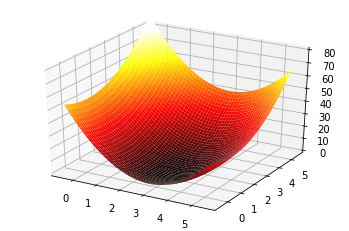

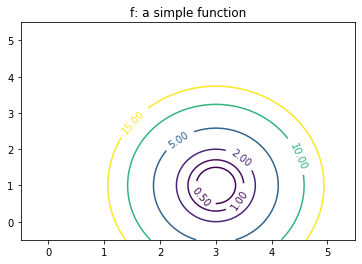

In [9]:
import problem32 as pb32

from plotLib import *
%matplotlib inline

custom_3dplot( pb32.f, pb32.x1_min,pb32.x1_max,pb32.x2_min,pb32.x2_max,pb32.nb_points, pb32.vmin, pb32.vmax )
level_plot( pb32.f, pb32.x1_min,pb32.x1_max,pb32.x2_min,pb32.x2_max,pb32.nb_points, pb32.levels , pb32.title )

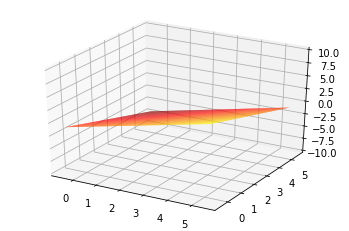

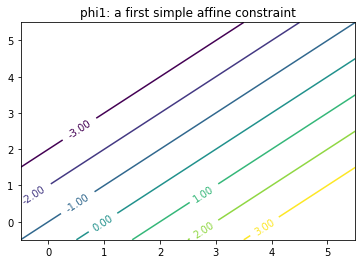

In [10]:
from plotLib import *
%matplotlib inline

custom_3dplot( pb32.phi1, pb32.x1_min,pb32.x1_max,pb32.x2_min,pb32.x2_max,pb32.nb_points, pb32.phi1vmin, pb32.phi1vmax )
level_plot( pb32.phi1, pb32.x1_min,pb32.x1_max,pb32.x2_min,pb32.x2_max,pb32.nb_points, pb32.phi1levels , pb32.phi1title )

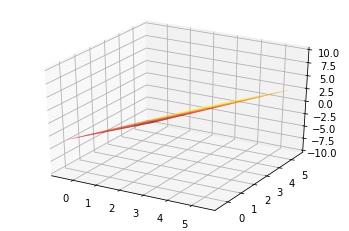

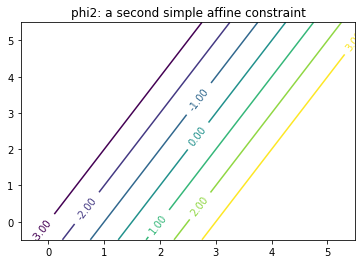

In [11]:
from plotLib import *
%matplotlib inline

custom_3dplot( pb32.phi2, pb32.x1_min,pb32.x1_max,pb32.x2_min,pb32.x2_max,pb32.nb_points, pb32.phi1vmin, pb32.phi1vmax )
level_plot( pb32.phi2, pb32.x1_min,pb32.x1_max,pb32.x2_min,pb32.x2_max,pb32.nb_points, pb32.phi1levels , pb32.phi2title )


> Run the Uzawa method on the problem32

In [12]:
from algoUzawa import *  # import all methods of the module into the current environment

import problem32 as pb32

import numpy as np

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.001                     # Sought precision
ITE_MAX = 25                       # Max number of iterations
x0      = np.array( (0.0,0.0 ) )   # Initial point: does it satisfies the constraint ?
#step    = 1.5/pb21.L                # Stepsize 
rho = pb32.rhomax/2.    #step size in the projected gradient for the dual
lambda0 = np.array( [2.0 , 1.0 ])  

##### Uzawa affine algorithm

val = pb32.lagrangian(x0,lambda0)
print("val = ({:.2f}) \n".format(val))
val = pb32.lagrangian(x0,lambda0)
g,H = pb32.lagrangian_grad_hessian(x0,lambda0)
print("gradient = ({:.2f},{:.2f}) \n".format(g[0],g[1]))

lambdak,xk,x_tab = uzawa_affine_algorithm(pb32.f , pb32.lagrangian, pb32.lagrangian_grad_hessian,  pb32.phi, x0 , lambda0, rho , PREC , ITE_MAX )

print("phi(xk) = ",(pb32.phi(xk)))
print("lambdak = ",(lambdak))
print("(phi(xk) < PREC) = ",(pb32.phi(xk)<PREC))

val = (33.00) 

gradient = (-20.00,-7.00) 

--------------------------
 Constant Stepsize projected gradient
-------------------
START    -- stepsize = 2.0
------------------------------------
Newton's algorithm
------------------------------------
START
Newton FINISHED -- 1 iterations / 0.000095s -- langrangian final value: 1.875000 at point x (2.50,1.75) 


xk = (2.50,1.75) ; gradLangragian = (0.00,0.00) 

------------------------------------
Newton's algorithm
------------------------------------
START
Newton FINISHED -- 1 iterations / 0.000073s -- langrangian final value: 2.109375 at point x (2.44,1.75) 


xk = (2.44,1.75) ; gradLangragian = (0.00,0.00) 

------------------------------------
Newton's algorithm
------------------------------------
START
Newton FINISHED -- 1 iterations / 0.000082s -- langrangian final value: 2.317383 at point x (2.45,1.66) 


xk = (2.45,1.66) ; gradLangragian = (0.00,0.00) 

------------------------------------
Newton's algorithm
--------------------

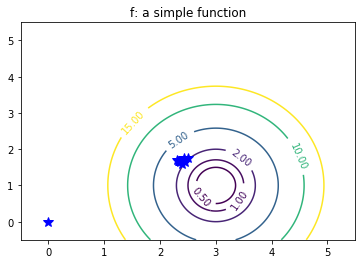

In [13]:
from plotLib import *
%matplotlib inline

level_points_plot( pb32.f , x_tab , pb32.x1_min,pb32.x1_max,pb32.x2_min,pb32.x2_max,pb32.nb_points, pb32.levels , pb32.title )

# Annex: Newton method for $\min_x=L(x,mu)$ (Second Order algorithms)
 
For minimizing according to $x$ a *twice* differentiable function 
 $L(x,\mu):\mathbb{R}^n \times \mathbb{R}_+^m \to \mathbb{R}$,
 at fixed $\mu$ given:
 * the function to minimize `Lagrangian(x,mu)`
 * a 2nd order oracle `Lagrangian_grad_hessian` (see `problem31.ipynb` for instance)
 * an initialization point `x0`
 * the fixed vector `mu`
 * the sought precision `PREC` 
 * a maximal number of iterations `ITE_MAX` 
 
 
 these algorithms perform iterations of the form
 $$ x^{k+1} = x^k - [\nabla^2 L(x^k,\mu) ]^{-1} \nabla L(x^k,\mu) .$$
 where the Hessian and gradient are according to $x$ at fixed $\mu$

# Appendix: <a id="pbs">Problems</a>

The problems we consider in this lab around uzawa is minimizations of convex functions under affine constraints using the Uzawa algorithms. The function `f` considered is identical to the first function froms the first lab.

However, more involved functions could also be tested just as less simple qualified convex constraints compare to affine constraints.... 


> **1.** <a id="pb31">`problem1`</a> features a simple quadratic function
$$\begin{array}{rrcll}
f: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & 4 (x_1-3)^2 + 2(x_2 + 0.5)^2
\end{array}$$
<center><img src="Fig/1.png" width="50%"></center>

